# Module 1- Merging DataFrames with PANDAS

## Activation

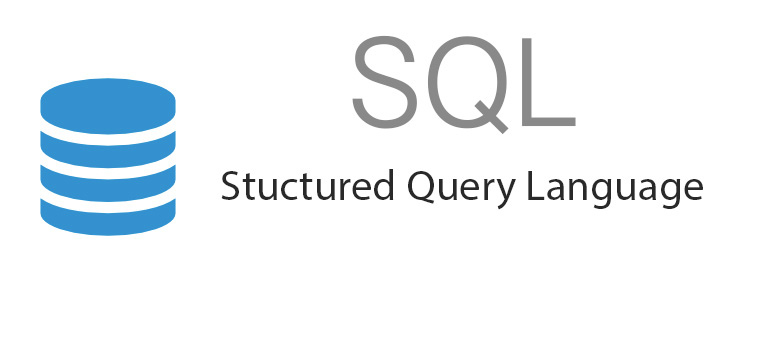


- PANDAS and SQL are two of the three main tools along with R used by data scientist. 
- https://towardsdatascience.com/how-to-avoid-rookie-mistakes-in-the-field-of-data-science-3076017cdab1


![merg_panda](https://raw.githubusercontent.com/Raigred/mlcourse.ai/master/img/merg_panda.jpg "merg_panda")

## Merge Types

Pandas has the merge types listed below. These merge types are common across most database and data-orientated languages (SQL, R, SAS) and are typically referred to as “joins”. 

* **Inner Merge / Inner join** – The default Pandas behaviour, only keep rows where the merge “on” value exists in both the left and right dataframes.

* **Left Merge / Left outer join** – (aka left merge or left join) **Keeps every row in the left dataframe**. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.  

* **Right Merge / Right outer join** – (aka right merge or right join) **Keeps every row in the right dataframe**. Where there are missing values of the “on” variable in the left column, add empty / NaN values in the result.  

* **Outer Merge / Full outer join** – A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

The `merge` type to use is specified using the `how` parameter in the merge command, taking values `left`, `right`, `inner` (default), or `outer`.

Venn diagrams are commonly used to exemplify the different merge and join types.

![Venn diagrams](https://raw.githubusercontent.com/Raigred/mlcourse.ai/master/img/join-types-merge-names.jpg "Venn diagrams")

In [1]:
import pandas as pd

In [2]:
data_1 = [('Houston', 'Samantha','18' ),
         ('Seattle','Alex','17'),
         ('New York','Dante','26')]
labels_1 = ['city','name', 'age']

data_2 = [('Houston', 'John', '21' ),
         ('Atlanta','Heather','17'),
         ('New York','Sara','26')]
labels_2 = ['city','name', 'age']

In [3]:
data_1 = pd.DataFrame.from_records(data_1, columns=labels_1)
data_2 = pd.DataFrame.from_records(data_2, columns=labels_2)

In [4]:
data_1

city      name age
0   Houston  Samantha  18
1   Seattle      Alex  17
2  New York     Dante  26

In [5]:
data_2

city     name age
0   Houston     John  21
1   Atlanta  Heather  17
2  New York     Sara  26

### Merging DataFrames


- An *inner merge, (or inner join)* keeps only the common values in both the left and right dataframes for the result.

In [6]:
combined = pd.merge(data_1, data_2, on='city')

In [15]:
# How many rows should we have?
combined

city    name_x age_x name_y age_y
0   Houston  Samantha    18   John    21
1  New York     Dante    26   Sara    26

- This is great but what about if two students in the same city have the same name?

In [33]:
data_1 = [('01','Houston', 'Samantha','18' ),
         ('02','Seattle','Alex','17'),
         ('03','New York','Dante','26')]
labels_1 = ['ID','city','name', 'age']

data_2 = [('04','Houston', 'Samantha', '21' ),
         ('05','Atlanta','Heather','17'),
         ('06','New York','Sara','26')]

In [34]:
data_1 = pd.DataFrame.from_records(data_1, columns=labels_1)
data_2 = pd.DataFrame.from_records(data_2, columns=labels_1)

In [35]:
data_1

ID      city      name age
0  01   Houston  Samantha  18
1  02   Seattle      Alex  17
2  03  New York     Dante  26

In [36]:
data_2

ID      city      name age
0  04   Houston  Samantha  21
1  05   Atlanta   Heather  17
2  06  New York      Sara  26

In [37]:
merge_by_city = pd.merge(data_1, data_2, on='city')
print(merge_by_city)

  ID_x      city    name_x age_x ID_y    name_y age_y
0   01   Houston  Samantha    18   04  Samantha    21
1   03  New York     Dante    26   06      Sara    26


In [38]:
merge_by_name = pd.merge(data_2, data_1, on='name')
print(merge_by_name)

  ID_x   city_x      name age_x ID_y   city_y age_y
0   04  Houston  Samantha    21   01  Houston    18


### Merging on columns with non-matching labels

- What if in one data set the name is recorded as **first name**?

In [47]:
data_1 = [('01','Houston', 'Samantha','18' ),
         ('02','Seattle','Alex','17'),
         ('03','New York','Dante','26')]
labels_1 = ['ID','city','name', 'age']

data_2 = [('04','Houston', 'Samantha', '21' ),
         ('05','Atlanta','Heather','17'),
         ('06','New York','Sara','26')]
labels_2 = ['ID','city','first_name', 'age']

In [48]:
data_1 = pd.DataFrame.from_records(data_1, columns=labels_1)
data_2 = pd.DataFrame.from_records(data_2, columns=labels_2)

In [49]:
# What happens when we try to merge?
combined = pd.merge(data_1, data_2,on='name')
print(combined)

KeyError: 'name'

In [42]:
combined = pd.merge(data_1, data_2, left_on='name', right_on='first_name')
print(combined)

  ID_x   city_x      name age_x ID_y   city_y first_name age_y
0   01  Houston  Samantha    18   04  Houston   Samantha    21


### Merging on multiple columns  


In [52]:
# Let's add a state for each data set.
data_1['state'] = ['TX','WA','NY']
data_2['state'] = ['TX','GA','NY']

In [44]:
data_1

ID      city      name age state
0  01   Houston  Samantha  18    TX
1  02   Seattle      Alex  26    WA
2  03  New York     Dante  17    NY

In [45]:
data_2

ID      city first_name age state
0  04   Houston   Samantha  21    TX
1  05   Atlanta    Heather  17    GA
2  06  New York       Sara  26    NY

In [46]:
# Merge data sets on 'age', 'city'
merge_multi = pd.merge(data_1, data_2, on=['age', 'city'])
print(merge_multi)

Empty DataFrame
Columns: [ID_x, city, name, age, state_x, ID_y, first_name, state_y]
Index: []


### Right Merge / Right outer join

- (aka right merge or right join) Keep every row in the right dataframe. Where there are missing values of the “on” variable in the left column, add empty / NaN values in the result.

In [54]:
right_merge = pd.merge(data_1, data_2, how='right', on=['city', 'state'])

In [55]:
right_merge

ID_x      city      name age_x state ID_y first_name age_y
0   01   Houston  Samantha    18    TX   04   Samantha    21
1   03  New York     Dante    26    NY   06       Sara    26
2  NaN   Atlanta       NaN   NaN    GA   05    Heather    17

### Left Merge / Left outer join

- (aka left merge or left join) Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.

In [56]:
left_merge = pd.merge(data_1, data_2, how='left', left_on=['city', 'name'], right_on=['city', 'first_name'])
print(left_merge)

  ID_x      city      name age_x state_x ID_y first_name age_y state_y
0   01   Houston  Samantha    18      TX   04   Samantha    21      TX
1   02   Seattle      Alex    17      WA  NaN        NaN   NaN     NaN
2   03  New York     Dante    26      NY  NaN        NaN   NaN     NaN


### Outer Merge / Full outer join

- A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

In [57]:
merge_outer = pd.merge(data_1, data_2, how='outer')
merge_outer

ID      city      name age state first_name
0  01   Houston  Samantha  18    TX        NaN
1  02   Seattle      Alex  17    WA        NaN
2  03  New York     Dante  26    NY        NaN
3  04   Houston       NaN  21    TX   Samantha
4  05   Atlanta       NaN  17    GA    Heather
5  06  New York       NaN  26    NY       Sara

In [58]:
merge_outer_on = pd.merge(data_1, data_2, how='outer', on=['city','state'])
print(merge_outer)

   ID      city      name age state first_name
0  01   Houston  Samantha  18    TX        NaN
1  02   Seattle      Alex  17    WA        NaN
2  03  New York     Dante  26    NY        NaN
3  04   Houston       NaN  21    TX   Samantha
4  05   Atlanta       NaN  17    GA    Heather
5  06  New York       NaN  26    NY       Sara
